In [1]:
from importlib import reload

import GPRutils
import vK2KGPR
import plotGPR

import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import astropy.stats as stats

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
reload(GPRutils)
dataC = GPRutils.dataContainer()
dataC.load(expNum=364215)
dataC.splitData()

Exposure: 364215
Band: b'z'
Number of objects: 110646


INFO: Query finished. [astroquery.utils.tap.core]
There were 10847 matches within 0.5 arcsec.
110359 total detections
8446 training set detections
2112 validation set detections
99801 prediction set detections


In [3]:
%%time
reload(vK2KGPR)
GP = vK2KGPR.vonKarman2KernelGPR(dataC, printing=True, outDir=".")

CPU times: user 60.4 ms, sys: 7.58 ms, total: 67.9 ms
Wall time: 5.86 ms


In [4]:
%%time
GP.fitCorr()

/home/fortino/DESworkspace/vonkarmanFT.py:65: RuntimeWarning: divide by zero encountered in true_divide
  airy = (j1(kR)/(kR))**2
/home/fortino/DESworkspace/vonkarmanFT.py:65: RuntimeWarning: invalid value encountered in true_divide
  airy = (j1(kR)/(kR))**2
/home/fortino/DESworkspace/vonkarmanFT.py:75: RuntimeWarning: divide by zero encountered in true_divide
  w = np.where(kWind==0, 1., np.sin(kWind) / kWind)
/home/fortino/DESworkspace/vonkarmanFT.py:75: RuntimeWarning: invalid value encountered in true_divide
  w = np.where(kWind==0, 1., np.sin(kWind) / kWind)


   RSS: 1.9750275     var: 53.3651987     oS: 1.0000000       d: 0.1000000  wind_x: 0.0500000  wind_y: 0.0500000 
   RSS: 3.8873629     var: 61.3699785     oS: 1.0000000       d: 0.1000000  wind_x: 0.0500000  wind_y: 0.0500000 
   RSS: 2.1416557     var: 53.3651987     oS: 1.1500000       d: 0.1000000  wind_x: 0.0500000  wind_y: 0.0500000 
   RSS: 2.4148807     var: 53.3651987     oS: 1.0000000       d: 0.1150000  wind_x: 0.0500000  wind_y: 0.0500000 
   RSS: 2.0740043     var: 53.3651987     oS: 1.0000000       d: 0.1000000  wind_x: 0.0575000  wind_y: 0.0500000 
   RSS: 2.0388509     var: 53.3651987     oS: 1.0000000       d: 0.1000000  wind_x: 0.0500000  wind_y: 0.0575000 
   RSS: 1.2206744     var: 45.3604189     oS: 1.0600000       d: 0.1060000  wind_x: 0.0530000  wind_y: 0.0530000 
   RSS: 1.3294286     var: 37.3556391     oS: 1.0900000       d: 0.1090000  wind_x: 0.0545000  wind_y: 0.0545000 
   RSS: 1.5107793     var: 50.1632868     oS: 1.0840000       d: 0.0874000  wind_x: 0.05

In [5]:
%%time
GP.fit(GP.opt_result[0])

CPU times: user 35min, sys: 3min 28s, total: 38min 29s
Wall time: 2min 43s


In [6]:
%%time
GP.predict(GP.dC.Xvalid)

CPU times: user 4min 26s, sys: 34.7 s, total: 5min
Wall time: 14.9 s


/home/fortino/DESworkspace/GPRutils.py:663: RuntimeWarning: invalid value encountered in true_divide
  sumWeights_x / sumWeights,
/home/fortino/DESworkspace/GPRutils.py:667: RuntimeWarning: invalid value encountered in true_divide
  sumWeights_y / sumWeights,
/home/fortino/DESworkspace/GPRutils.py:671: RuntimeWarning: divide by zero encountered in reciprocal
  sumWeights**-1.,
/home/fortino/DESworkspace/GPRutils.py:682: RuntimeWarning: invalid value encountered in less
  sumWeights < (maxErr**2.).value)
/home/fortino/DESworkspace/GPRutils.py:689: RuntimeWarning: invalid value encountered in greater
  RMS_x = np.std(sumWeights_x[sumWeights > 0.])*u.mas
/home/fortino/DESworkspace/GPRutils.py:690: RuntimeWarning: invalid value encountered in greater
  RMS_y = np.std(sumWeights_y[sumWeights > 0.])*u.mas
/home/fortino/DESworkspace/GPRutils.py:691: RuntimeWarning: invalid value encountered in greater
  noise = np.sqrt(np.mean(sumWeights[sumWeights > 0.]))*u.mas


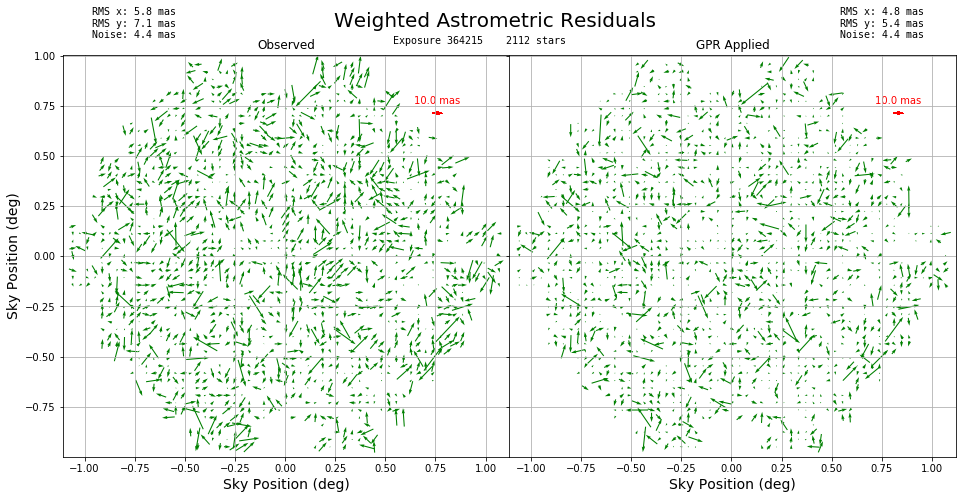

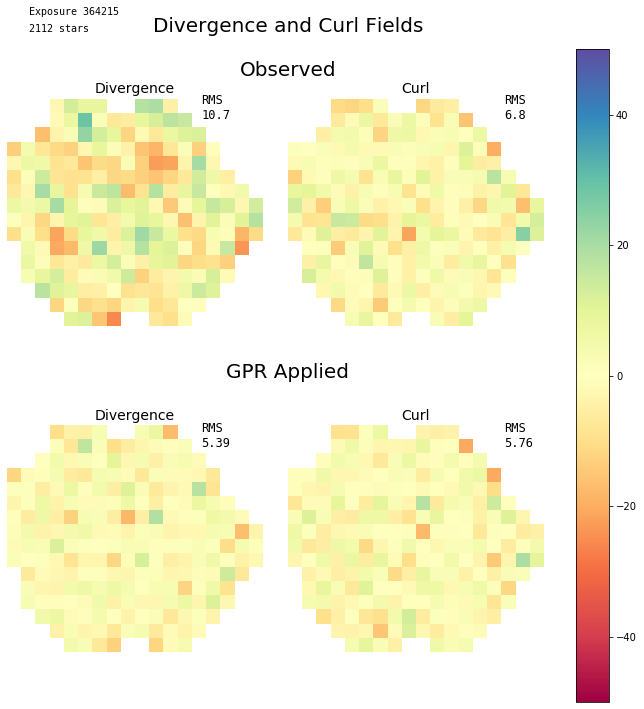

/home/fortino/DESworkspace/GPRutils.py:831: RuntimeWarning: invalid value encountered in true_divide
  logr /= counts
/home/fortino/DESworkspace/GPRutils.py:837: RuntimeWarning: invalid value encountered in true_divide
  xiplus /= counts
/home/fortino/DESworkspace/GPRutils.py:842: RuntimeWarning: invalid value encountered in true_divide
  xiz2 /= counts
/home/fortino/DESworkspace/GPRutils.py:851: RuntimeWarning: invalid value encountered in true_divide
  ximinus /= counts
/home/fortino/DESworkspace/plotGPR.py:499: RuntimeWarning: invalid value encountered in less_equal
  ind = np.where(r <= sep.to(u.deg).value)[0]


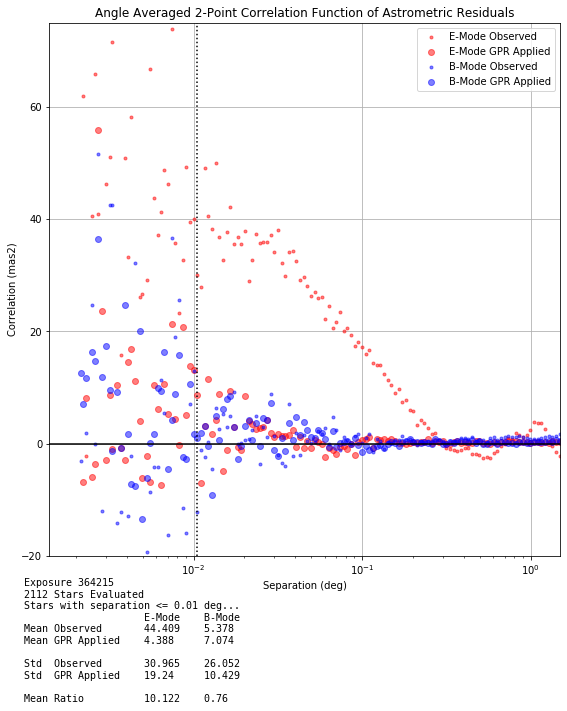

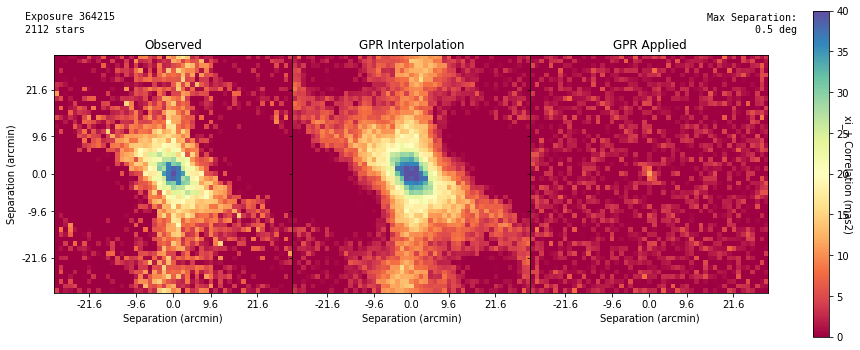

In [7]:
dataC.quickPlot()

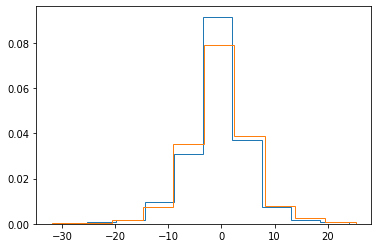

In [8]:
dY = GP.dC.Yvalid - GP.dC.fbar_s
plt.hist(dY[:, 0], histtype="step", density=True)
plt.hist(dY[:, 1], histtype="step", density=True)
plt.show()

In [9]:
mask = stats.sigma_clip(
    dataC.Yvalid - dataC.fbar_s,
    sigma=4, axis=0).mask
mask = ~np.logical_or(*mask.T)

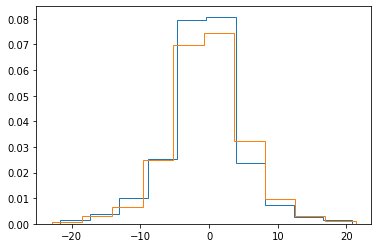

In [10]:
plt.hist(dY[mask, 0], histtype="step", density=True)
plt.hist(dY[mask, 1], histtype="step", density=True)
plt.show()

In [11]:
mask = stats.sigma_clip(
    dataC.Yvalid - dataC.fbar_s,
    sigma=4, axis=0).mask
mask = ~np.logical_or(*mask.T)

dataC.Xvalid = dataC.Xvalid[mask]
dataC.Yvalid = dataC.Yvalid[mask]
dataC.Evalid_DES = dataC.Evalid_DES[mask]
dataC.Evalid_GAIA = dataC.Evalid_GAIA[mask]

In [12]:
GP.predict(GP.dC.Xtrain)

mask = stats.sigma_clip(
    dataC.Ytrain - dataC.fbar_s,
    sigma=4, axis=0).mask
mask = ~np.logical_or(*mask.T)

dataC.Xtrain = dataC.Xtrain[mask]
dataC.Ytrain = dataC.Ytrain[mask]
dataC.Etrain_DES = dataC.Etrain_DES[mask]
dataC.Etrain_GAIA = dataC.Etrain_GAIA[mask]

In [17]:
%%time
GP.fitCorr(v0=GP.opt_result[0])

   RSS: 0.6921256     var: 40.3556188     oS: 0.7504943       d: 0.1187455  wind_x: -0.0790279 wind_y: 0.1270648 
   RSS: 0.7299876     var: 46.4089616     oS: 0.7504943       d: 0.1187455  wind_x: -0.0790279 wind_y: 0.1270648 
   RSS: 0.6453569     var: 40.3556188     oS: 0.8630685       d: 0.1187455  wind_x: -0.0790279 wind_y: 0.1270648 
   RSS: 0.6444282     var: 40.3556188     oS: 0.7504943       d: 0.1365573  wind_x: -0.0790279 wind_y: 0.1270648 
   RSS: 0.6887422     var: 40.3556188     oS: 0.7504943       d: 0.1187455  wind_x: -0.0908820 wind_y: 0.1270648 
   RSS: 0.6451751     var: 40.3556188     oS: 0.7504943       d: 0.1187455  wind_x: -0.0790279 wind_y: 0.1461245 
   RSS: 1.2478314     var: 34.3022760     oS: 0.7955240       d: 0.1258702  wind_x: -0.0837695 wind_y: 0.1346887 
   RSS: 0.6125395     var: 43.3822902     oS: 0.7617517       d: 0.1205267  wind_x: -0.0802133 wind_y: 0.1289708 
   RSS: 0.6126562     var: 41.5662873     oS: 0.8000269       d: 0.1265827  wind_x: -0.0

In [18]:
%%time
GP.fit(GP.opt_result[0])

CPU times: user 34min, sys: 3min 25s, total: 37min 25s
Wall time: 2min 39s


In [19]:
%%time
GP.predict(GP.dC.Xvalid)

CPU times: user 4min 26s, sys: 34.9 s, total: 5min 1s
Wall time: 16.1 s


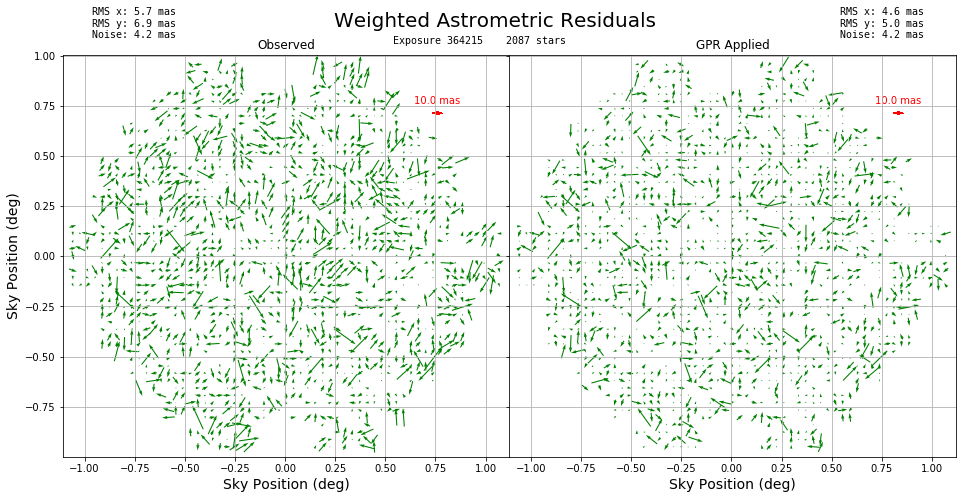

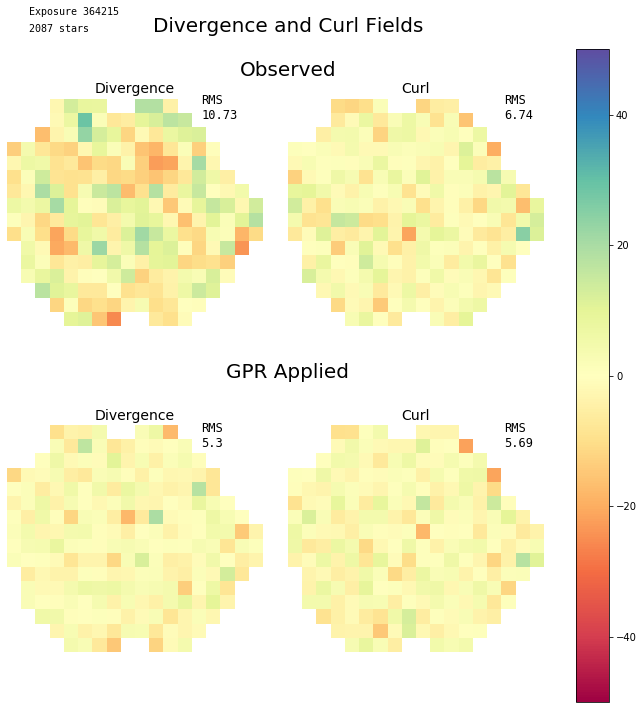

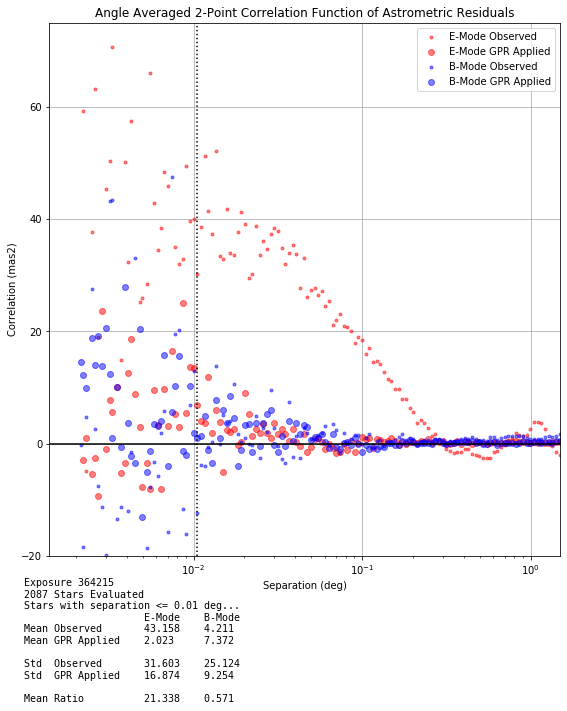

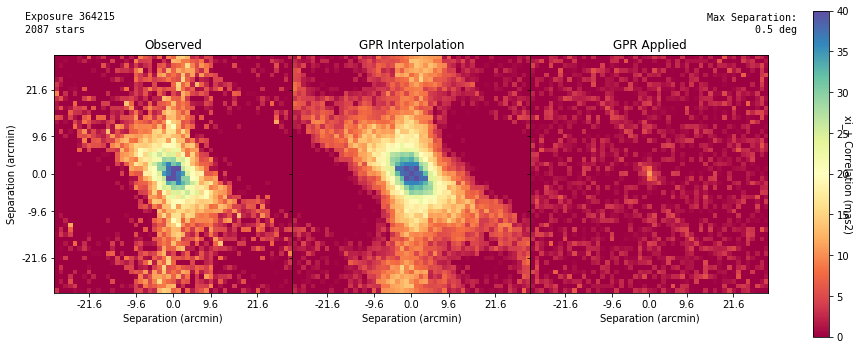

In [20]:
dataC.quickPlot()

In [ ]:
%%time
GP.optimize()

  xi_+: 7.1646517     var: 41.8092937     oS: 0.7141601       d: 0.1245237  wind_x: -0.0781728 wind_y: 0.1606724 
  xi_+: 7.1256084     var: 48.0806877     oS: 0.7141601       d: 0.1245237  wind_x: -0.0781728 wind_y: 0.1606724 
  xi_+: 7.2132003     var: 41.8092937     oS: 0.8212841       d: 0.1245237  wind_x: -0.0781728 wind_y: 0.1606724 
  xi_+: 7.4141420     var: 41.8092937     oS: 0.7141601       d: 0.1432023  wind_x: -0.0781728 wind_y: 0.1606724 
  xi_+: 7.1041152     var: 41.8092937     oS: 0.7141601       d: 0.1245237  wind_x: -0.0898987 wind_y: 0.1606724 
  xi_+: 7.3922560     var: 41.8092937     oS: 0.7141601       d: 0.1245237  wind_x: -0.0781728 wind_y: 0.1847733 
  xi_+: 7.0359070     var: 44.3178513     oS: 0.7570097       d: 0.1058452  wind_x: -0.0828631 wind_y: 0.1703127 
  xi_+: 7.0133388     var: 45.5721301     oS: 0.7784345       d: 0.0871666  wind_x: -0.0852083 wind_y: 0.1751329 
  xi_+: 6.9261859     var: 45.8229859     oS: 0.7827195       d: 0.1095809  wind_x: -0.0